In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [2]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2 + x-x

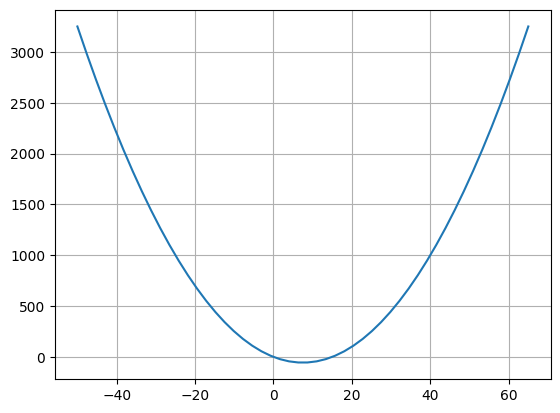

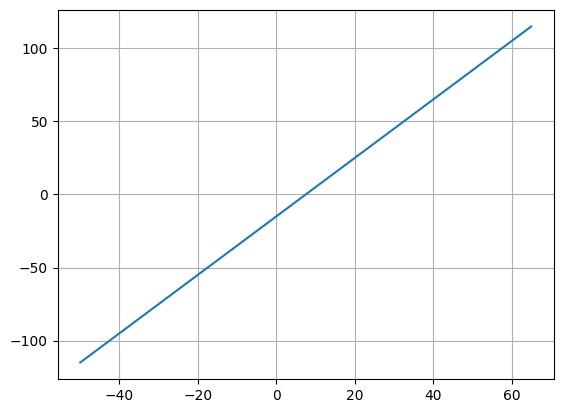

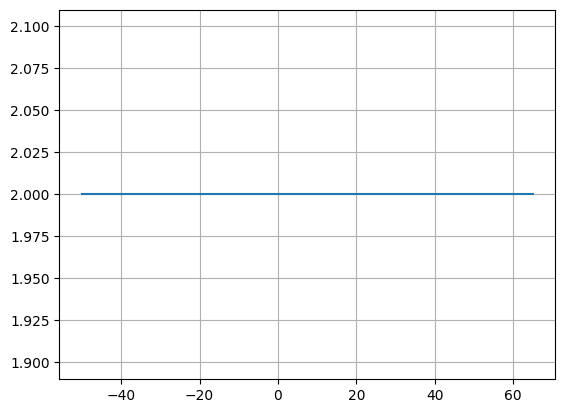

In [3]:
x = np.linspace(-50, 65)

plt.plot(x, f(x))
plt.grid()
plt.show()

plt.plot(x, Df(x))
plt.grid()
plt.show()

plt.plot(x, DDf(x))
plt.grid()
plt.show()

In [4]:
def gradient_descent_single_variable(f, Df, x, epsilon, alpha):
    gradient = Df(x)

    i=0
    while gradient >= epsilon:
        x = x - alpha * gradient
        gradient = Df(x)

        i += 1

    return x, gradient, i

In [5]:
def newton_single_variable(f, Df, DDf, x, epsilon, alpha=1):
    gradient = Df(x)

    i=0
    while gradient >= epsilon:
        x = x - alpha * (Df(x) / DDf(x))
        gradient = Df(x)

        i += 1

    return x, gradient, i

In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1
alpha = 0.01
x0 = 40
epsilon = 0.1

x_min, gradient, iterations = gradient_descent_single_variable(f, Df, x0, epsilon, alpha)

print(f'GD Results with x0={x0}, lr={alpha}, epsilon={epsilon}')
print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

GD Results with x0=40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
x0 = 40
epsilon = 0.1

x_min, gradient, iterations = newton_single_variable(f, Df, DDf, x0, epsilon)

print(f'Newton Results with x0={x0}, epsilon={epsilon}')
print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Newton Results with x0=40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1
alpha = 0.8
x0 = 40
epsilon = 0.1

x_min, gradient, iterations = newton_single_variable(f, Df, DDf, x0, epsilon, alpha)

print(f'Newton Results with x0={x0}, lr={alpha}, epsilon={epsilon}')
print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Newton Results with x0=40, lr=0.8, epsilon=0.1
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [9]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

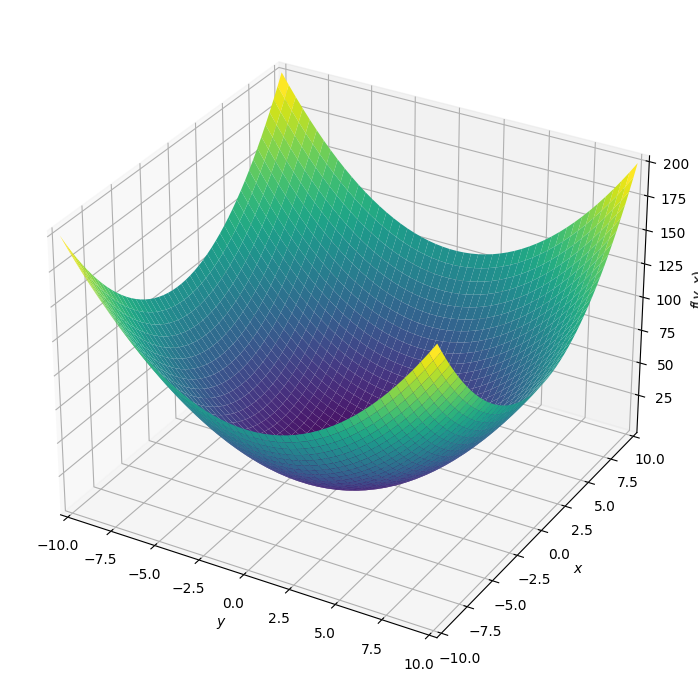

In [10]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

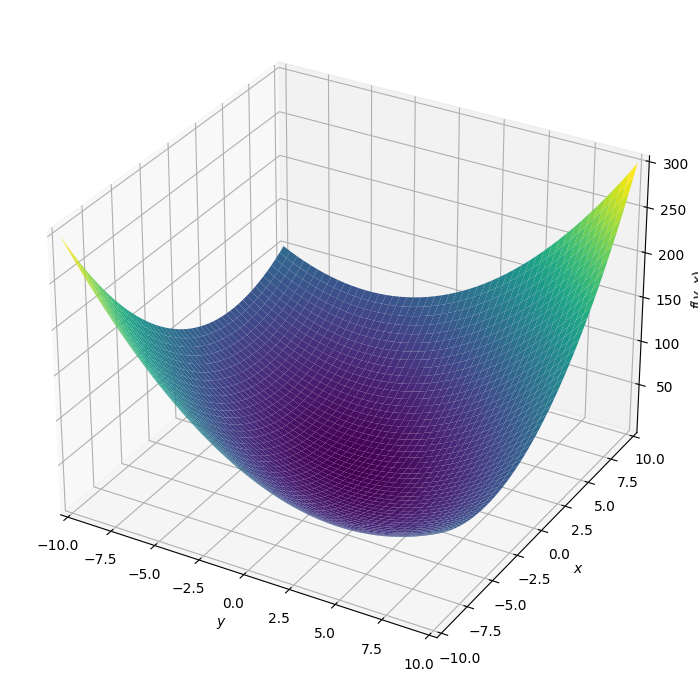

In [11]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

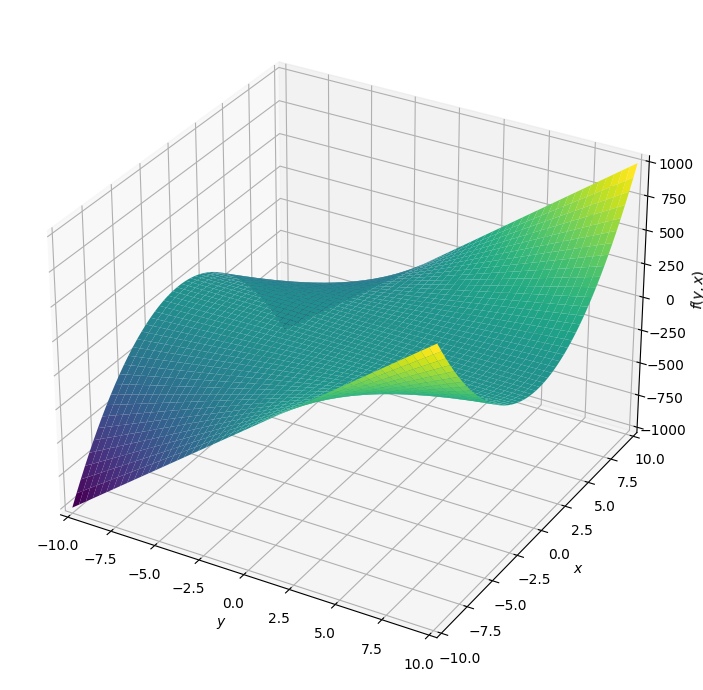

In [12]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [13]:
def gradient_descent_multi_variable(f, Df, x, epsilon, alpha):
    gradient = Df(x)

    i = 0
    while abs(np.linalg.norm(gradient)) >= epsilon:
        x = x - alpha * gradient
        gradient = Df(x)

        i += 1

    return x, gradient, i


In [14]:
def newton_multi_variable(f, Df, DDf, x, epsilon, alpha=1):
    gradient = Df(x)

    i=0
    while abs(np.linalg.norm(gradient)) >= epsilon:
        hessian = DDf(x)
        x = x - alpha * (np.linalg.inv(hessian) @ Df(x))
        gradient = Df(x)

        i += 1

    return x, gradient, i

In [15]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [16]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [17]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001
alpha = 0.1
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = gradient_descent_multi_variable(f_1, Df_1, x0, epsilon, alpha)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 46 iterations.
x_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


In [18]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
alpha = 0.5
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = gradient_descent_multi_variable(f_1, Df_1, x0, epsilon, alpha)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 1 iterations.
x_min = [0. 0.]
Gradient = [0. 0.]


In [19]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = newton_multi_variable(f_1, Df_1, DDf_1, x0, epsilon)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 1 iterations.
x_min = [0. 0.]
Gradient = [0. 0.]


In [20]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001
alpha = 0.5
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = newton_multi_variable(f_1, Df_1, DDf_1, x0, epsilon, alpha)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 15 iterations.
x_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


In [21]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
alpha = 0.5
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = gradient_descent_multi_variable(f_2, Df_2, x0, epsilon, alpha)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 16 iterations.
x_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [22]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = newton_multi_variable(f_2, Df_2, DDf_2, x0, epsilon)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 1 iterations.
x_min = [1.77635684e-15 0.00000000e+00]
Gradient = [3.55271368e-15 1.77635684e-15]


In [23]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001
alpha = 0.9
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = newton_multi_variable(f_2, Df_2, DDf_2, x0, epsilon, alpha)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 5 iterations.
x_min = [0.0001 0.0001]
Gradient = [0.0003 0.0003]


In [24]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [25]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001
alpha = 0.01
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = gradient_descent_multi_variable(f_5, Df_5, x0, epsilon, alpha)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 79 iterations.
x_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


In [26]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x0 = (10, 10)
epsilon = 0.001

x_min, gradient, iterations = newton_multi_variable(f_5, Df_5, DDf_5, x0, epsilon)

print(f'Found solution after {iterations} iterations.')
print(f'x_min = {x_min}')
print(f'Gradient = {gradient}')

Found solution after 9 iterations.
x_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [57]:
def BFGS(f, Df, x_prev, x_cur, epsilon, alpha=1):
    I = np.eye(len(x_cur))
    B_inv = np.eye(len(x_cur))

    gradient_prev = Df(x_prev)
    gradient_cur = Df(x_cur)

    i = 0
    while abs(np.linalg.norm(gradient_cur)) >= epsilon:
        delta_x = x_cur - x_prev
        y = gradient_cur - gradient_prev
        B_inv = (I - ((delta_x @ y.T) / (y.T @ delta_x))) @ B_inv @ (I -
                                                                     ((y @ delta_x.T) / (y.T @ delta_x))) + ((delta_x @ delta_x.T) / (y.T @ delta_x))
        x_prev = x_cur
        x_cur = x_cur - alpha * (B_inv @ gradient_cur)

        gradient_prev = Df(x_prev)
        gradient_cur = Df(x_cur)

        i += 1

    return x_cur, gradient_cur, i


In [72]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
epsilon = 0.001
x_min, gradient, iterations = BFGS(f_1, Df_1, xk_1, x0, epsilon)
print(f'Found solution after {iterations} iterations.')
print(f'x_min = \n {x_min}')
print(f'Gradient = \n {gradient}')

Found solution after 1 iterations.
x_min = 
 [[0.]
 [0.]]
Gradient = 
 [[0.]
 [0.]]


In [73]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9

xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
epsilon = 0.001
alpha = 0.9

x_min, gradient, iterations = BFGS(f_1, Df_1, xk_1, x0, epsilon, alpha)
print(f'Found solution after {iterations} iterations.')
print(f'x_min = \n {x_min}')
print(f'Gradient = \n {gradient}')

Found solution after 5 iterations.
x_min = 
 [[9.e-05]
 [9.e-05]]
Gradient = 
 [[0.00018]
 [0.00018]]


In [75]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001

xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
epsilon = 0.001
x_min, gradient, iterations = BFGS(f_2, Df_2, xk_1, x0, epsilon)
print(f'Found solution after {iterations} iterations.')
print(f'x_min = \n {x_min}')
print(f'Gradient = \n {gradient}')

Found solution after 1 iterations.
x_min = 
 [[3.55271368e-15]
 [1.77635684e-15]]
Gradient = 
 [[8.88178420e-15]
 [7.10542736e-15]]


In [77]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9

xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
epsilon = 0.001
alpha = 0.9
x_min, gradient, iterations = BFGS(f_2, Df_2, xk_1, x0, epsilon, alpha)
print(f'Found solution after {iterations} iterations.')
print(f'x_min = \n {x_min}')
print(f'Gradient = \n {gradient}')

Found solution after 5 iterations.
x_min = 
 [[9.e-05]
 [9.e-05]]
Gradient = 
 [[0.00027]
 [0.00027]]


In [78]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001

xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
epsilon = 0.001
x_min, gradient, iterations = BFGS(f_5, Df_5, xk_1, x0, epsilon)
print(f'Found solution after {iterations} iterations.')
print(f'x_min = \n {x_min}')
print(f'Gradient = \n {gradient}')

Found solution after 13 iterations.
x_min = 
 [[0.01534004]
 [0.01534004]]
Gradient = 
 [[0.00047063]
 [0.00023532]]
